# EDA (Exploration Data Analysis)

In [1]:
try:
  from google.colab import drive
  drive.mount('/content/gdrive')

  PATH_DRIVER = '/content/gdrive/My Drive/'
  DATA_FOLDER = 'Dataset/'

  !pip install fastai pydicom kornia fastcore==1.0.9 --upgrade --quiet
  
  from getpass import getpass
  user = getpass('GitHub user')
  password = getpass('GitHub password')
  import os
  os.environ['GITHUB_AUTH'] = user + ':' + password
  !git clone https://$GITHUB_AUTH@github.com/lluissalord/radiology_ai.git

  %cd radiology_ai

  IN_COLAB = True
except:
  PATH_DRIVER = ''
  DATA_FOLDER = 'data/'
  IN_COLAB = False

In [117]:
from fastai.basics import *
from fastai.medical.imaging import *

import pandas as pd
import os
import matplotlib.pyplot as plt

from utils import df_check_DICOM, sample_df_check_DICOM, get_each_case_samples

ImportError: cannot import name 'df_check_DICOM' from 'utils' (c:\Users\Lluis\Desktop\Machine Learning\radiology_ai\utils.py)

In [3]:
PATH_PREFIX = os.path.join(PATH_DRIVER, DATA_FOLDER, '')
raw_folder = PATH_PREFIX + 'DICOMS'
organize_folder = PATH_PREFIX + 'clasificacion_pendiente'
preprocess_folder = PATH_PREFIX + 'preprocess'

In [6]:
filename = raw_folder + '/01010000265254/ARIN1J7K5QQ7BeDIUIAP8PM4NVSG41D1DU1S970T5PVP84VGN999B'
# filename = raw_folder + '/03010001176119/0EHKK04CBOO1Ee7BR8O3GTR4N0VG41DEQ1MEPG0B3CM1DOPN2LBKG' # GDCM issue
# filename = organize_folder + '/CD/0/01010000265254.dcm'
dcm = dcmread(filename)

# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dcm.SOPClassUID)
print()

pat_name = dcm.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print("Patient's name....:", display_name)
print("Patient id........:", dcm.PatientID)
print("SeriesDescription.:", dcm.SeriesDescription)
print("Body Part Examined:", dcm.BodyPartExamined)
print("Modality..........:", dcm.Modality)
print("Study Date........:", dcm.StudyDate)

if 'PixelData' in dcm:
    rows = int(dcm.Rows)
    cols = int(dcm.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dcm.PixelData)))
    if 'PixelSpacing' in dcm:
        print("Pixel spacing....:", dcm.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dcm.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dcm.pixel_array, cmap=plt.cm.bone)
plt.show()


Filename.........: data/DICOMS/03010001176119/0EHKK04CBOO1Ee7BR8O3GTR4N0VG41DEQ1MEPG0B3CM1DOPN2LBKG
Storage type.....: 1.2.840.10008.5.1.4.1.1.1

Patient's name....: 1234, 
Patient id........: 1234
SeriesDescription.: TOBILLO AP MESA
Body Part Examined: ANKLE
Modality..........: CR
Study Date........: 20190702
Image size.......: 2089 x 2168, 2907564 bytes
Pixel spacing....: [0.140, 0.140]
Slice location...: (missing)


RuntimeError: The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. GDCM)

## Raw Data EDA

In [7]:
fnames = get_files(raw_folder)
df = pd.DataFrame.from_dicoms(
    fnames
)
df.T

ON', 'Manufacturer': 'SEDECAL DR2000C', 'InstitutionName': 'ASEPEYO ALICANTE', 'ReferringPhysicianName': 'apps', 'StationName': 'DROC', 'StudyDescription': 'Rodilla AP y LAT', 'SeriesDescription': 'TOBILLO LAT MESA', 'OperatorsName': 'apps', 'ManufacturerModelName': 'Copyright(C) SEDECAL Corp', 'ReferencedSOPInstanceUID': '10.11.1247.1104.166.1128.201907021943410.1', 'DerivationDescription': 'RaimDicomCs 1.0.13.406 - dcmcjpeg v3.6.0 - Lossless JPEG compression, selection value 1, point transform 0, compression ratio 3.1316 [SYMPHONY]', 'AnatomicRegionSequence': [], 'DerivationCodeSequence': (0008, 0100) Code Value                          SH: '121327'
(0008, 0102) Coding Scheme Designator            SH: 'DCM'
(0008, 0104) Code Meaning                        LO: 'Full fidelity image', 'PatientName': '1234', 'PatientID': '1234', 'PatientBirthDate': '19761028', 'PatientSex': 'M', 'PatientWeight': None, 'PatientComments': '', 'BodyPartExamined': 'ANKLE', 'KVP': "48.0", 'SoftwareVersions': 

0     \
                                                                          16   
SpecificCharacterSet                                              ISO_IR 100   
ImageType                                                            DERIVED   
SOPClassUID                                        1.2.840.10008.5.1.4.1.1.1   
SOPInstanceUID                 1216.1158.1243.113.1196.184.20190117113311.12   
...                                                                      ...   
DateOfLastDetectorCalibration                                            NaN   
TimeOfLastDetectorCalibration                                            NaN   
GridFocalDistance                                                        NaN   
MultiFieldOfViewDimensions                                               NaN   
FieldOfViewDimensions1                                                   NaN   

                                                                        1     \
                                                                          16   
SpecificCharacterSet                                              ISO_IR 100   
ImageType                                                            DERIVED   
SOPClassUID                                        1.2.840.10008.5.1.4.1.1.1   
SOPInstanceUID                 1216.1158.1243.113.1196.184.20190117113311.11   
...                                                                      ...   
DateOfLastDetectorCalibration                                            NaN   
TimeOfLastDetectorCalibration                                            NaN   
GridFocalDistance                                                        NaN   
MultiFieldOfViewDimensions                                               NaN   
FieldOfViewDimensions1                                                   NaN   

                                                                       2     \
                                                                         16   
SpecificCharacterSet                                             ISO_IR 100   
ImageType                                                           DERIVED   
SOPClassUID                                       1.2.840.10008.5.1.4.1.1.1   
SOPInstanceUID                 1216.1158.1243.113.1196.184.20190129103613.4   
...                                                                     ...   
DateOfLastDetectorCalibration                                           NaN   
TimeOfLastDetectorCalibration                                           NaN   
GridFocalDistance                                                       NaN   
MultiFieldOfViewDimensions                                              NaN   
FieldOfViewDimensions1                                                  NaN   

                                                                       3     \
                                                                         16   
SpecificCharacterSet                                             ISO_IR 100   
ImageType                                                           DERIVED   
SOPClassUID                                       1.2.840.10008.5.1.4.1.1.1   
SOPInstanceUID                 1216.1158.1243.113.1196.184.20190129103613.3   
...                                                                     ...   
DateOfLastDetectorCalibration                                           NaN   
TimeOfLastDetectorCalibration                                           NaN   
GridFocalDistance                                                       NaN   
MultiFieldOfViewDimensions                                              NaN   
FieldOfViewDimensions1                                                  NaN   

                                                                       4     \
                                                                         16   
SpecificCharacterSet                                             ISO_IR 100   
ImageType      

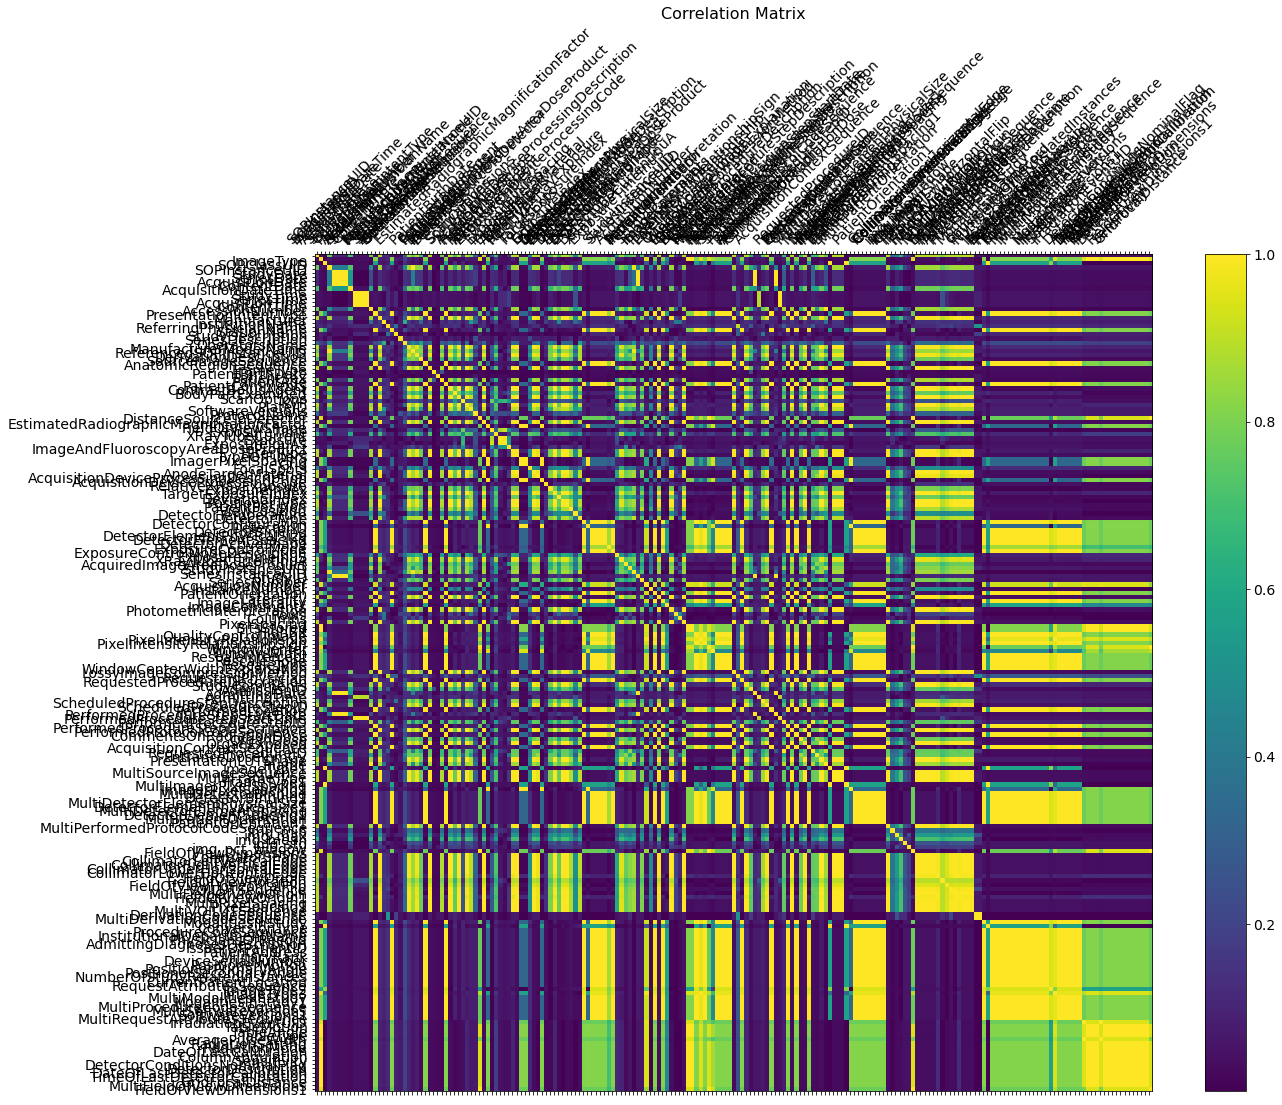

In [8]:
corr = df.astype('string').astype('category').apply(lambda x: x.cat.codes, axis=0).corr()

corr = corr.loc[corr.notnull().any(axis=0),corr.notnull().any(axis=1)].abs()

f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(corr.shape[1]), corr.columns, fontsize=14, rotation=45)
plt.yticks(range(corr.shape[1]), corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

In [25]:
pd.set_option('max_rows', 100)
repr_flds = [
    'SeriesDescription',
    'BodyPartExamined',
    # 'Modality',
    # 'StudyDescription',
    # 'ViewPosition',
    # 'AcquiredImageAreaDoseProduct'
]
pivot_df = df.pivot_table(values=['img_mean','img_std','img_max','img_min','PatientID', 'fname'], index=repr_flds,
                   aggfunc={'img_mean':'mean','img_max':'max','img_min':'min', 'img_std':'mean','PatientID':'count', 'fname': 'max'})
display(pivot_df)

PatientID  \
SeriesDescription          BodyPartExamined              
AMBAS MANOS                HAND                      3   
AMBAS MANOS OBL            HAND                      3   
AMBOS PIES                 FOOT                      1   
AXIAL DE ROTULAS           KNEE                      2   
CADERA OBL                 HIP                       2   
CERVICAL LAT               CSPINE                    1   
CODO AP DIRECTO            ELBOW                     2   
CODO LAT DIRECTO           ELBOW                     2   
HOMBRO AP                  UPPER LIMB                1   
HOMBRO AXIAL               UPPER LIMB                1   
LUMBAR BIPE LAT            LSPINE                    1   
MANO OBL DIRECTO           UPPER LIMB                1   
MANO PA DIRECTO            UPPER LIMB                1   
MUÑECA LAT DIRECTO         HAND                      6   
MUÑECA PA DIRECTO          HAND                      6   
OUTLET                     UPPER LIMB                1   
PARRILLA AP BIPE           RIBS                      1   
PARRILLA COSTAL AP         THORAX                    1   
PARRILLA OBL BIPE          RIBS                      1   
PELVIS AP                  PELVIS                    1   
PIE AP DIRECTO             FOOT                      7   
                           LOWER LIMB                1   
PIE LAT EN CARGA           PIE EN CARGA              2   
PIE OBL DIRECTO            FOOT                      7   
                           LOWER LIMB                1   
PIERNA AP MESA             ANKLE                     1   
PIERNA LAT MESA            ANKLE                     1   
Prot. exam. (CR)                                     1   
RODILLA AP                 KNEE                    361   
                           LOWER LIMB              286   
RODILLA AP CARGA MONOPODAL LOWER LIMB               33   
RODILLA INTERCONDILEA      KNEE                      2   
RODILLA LAT                KNEE                    432   
                           LOWER LIMB              352   
RODILLA LAT EN CARGA       LOWER LIMB               36   
RODILLAS AP                KNEE                     59   
                           LOWER LIMB               63   
RODILLAS EN CARGA          KNEE STANDING             8   
ROTULA AXIAL               KNEE                      3   
ROTULA AXIAL DIRECTO       LOWER LIMB                4   
ROTULA AXIAL MESA          LOWER LIMB                2   
T Rodilla lat              KNEE                      2   
TIBIA AP DIRECTO           LOWER LIMB                1   
TIBIA LAT DIRECTO          LOWER LIMB                1   
TOBILLO AP                 LOWER LIMB                5   
TOBILLO AP MESA            ANKLE                    12   
TOBILLO LAT                LOWER LIMB                5   
TOBILLO LAT MESA           ANKLE                    12   

                                                                                                                        fname  \
SeriesDescription          BodyPartExamined                                                                                     
AMBAS MANOS                HAND              data\DICOMS\03010001201359\1COETP3H20M74e38PBB793LHV1TG41DPFQL8LA0Q0CSFPREQUV0UL   
AMBAS MANOS OBL            HAND              data\DICOMS\03010001201359\6UVI3OJDMCI7Me07S2AUSNFU0BVG41DPFQL9LG0G4J1MF0EMEHK16   
AMBOS PIES                 FOOT              data\DICOMS\03010001146965\CTQM3Q9E9U8GIeEL311C5PPESEVG41D2RVCBII0M40HPQF1DK1I3E   
AXIAL DE ROTULAS           KNEE              data\DICOMS\03010001186506\96KDQPKVF491Ce0O7VKF0J96RJ5G41DJELJFLU0C82NNLC065453C   
CADERA OBL                 HIP               data\DICOMS\03010001144954\EDPJDH20FAE3NeDRLF8QO89TR2HG41D1VNDLAF054NE04PGGKH50K   
CERVICAL LAT               CSPINE            data\DICOMS\03010001217535\FOGK8G4LBOA6AeCJ4EKPCFE98G9G41E0T83E710F1CFM0GM185QDJ   
CODO AP DIRECTO            ELBOW             data\DICOMS\03010001198387\1F875KESOFVLTeALF93TAN5549FG41DO15H8OT0D

In [160]:
def get_pixel_data(dcm):
    try:
        data = dcm.pixel_array
    except RuntimeError as e:
        data = None
        print(f'RuntimeError on file {dcm.fname}: ' + e)
    return data


def get_subplot_rows_cols(num_plots, n_cols = [3,4,5]):
    """ Calculate number row and cols for a pretty grid """
    max_cols = max(n_cols)
    if num_plots // max_cols == 0:
        subplot_rows = 1
        subplot_cols = num_plots
    else:
        found = False
        better_res = max(n_cols)
        better_n = None
        for n in sorted(n_cols, reverse=True):
            res = num_plots % n
            if res == 0:
                subplot_rows = num_plots // n
                subplot_cols = n
                found = True
                break
            elif better_res > res:
                better_res = res
                better_n = n

        if not found:
            subplot_rows = num_plots // better_n + 1
            subplot_cols = better_n
    return subplot_rows, subplot_cols


def plot_DCMs(fnames, max_samples=None, n_cols=[3,4,5], figsize=(15,15)):
    if max_samples is None:
        n = len(fnames)
    else:
        n = min(len(fnames), max_samples)
    rows, cols = get_subplot_rows_cols(n, n_cols)
    fig, axs = plt.subplots(rows, cols, figsize=figsize)

    for i, fname in enumerate(fnames[:n]):
        dcm = dcmread(fname)
        row = i // cols
        col = i % cols

        title = dcm.SeriesDescription + '|' + dcm.BodyPartExamined

        axs[row, col].imshow(get_pixel_data(dcm), cmap=plt.cm.bone)
        axs[row, col].set_title(title)

        axs[row, col].label_outer()

    fig.subplots_adjust()
    fig.show()

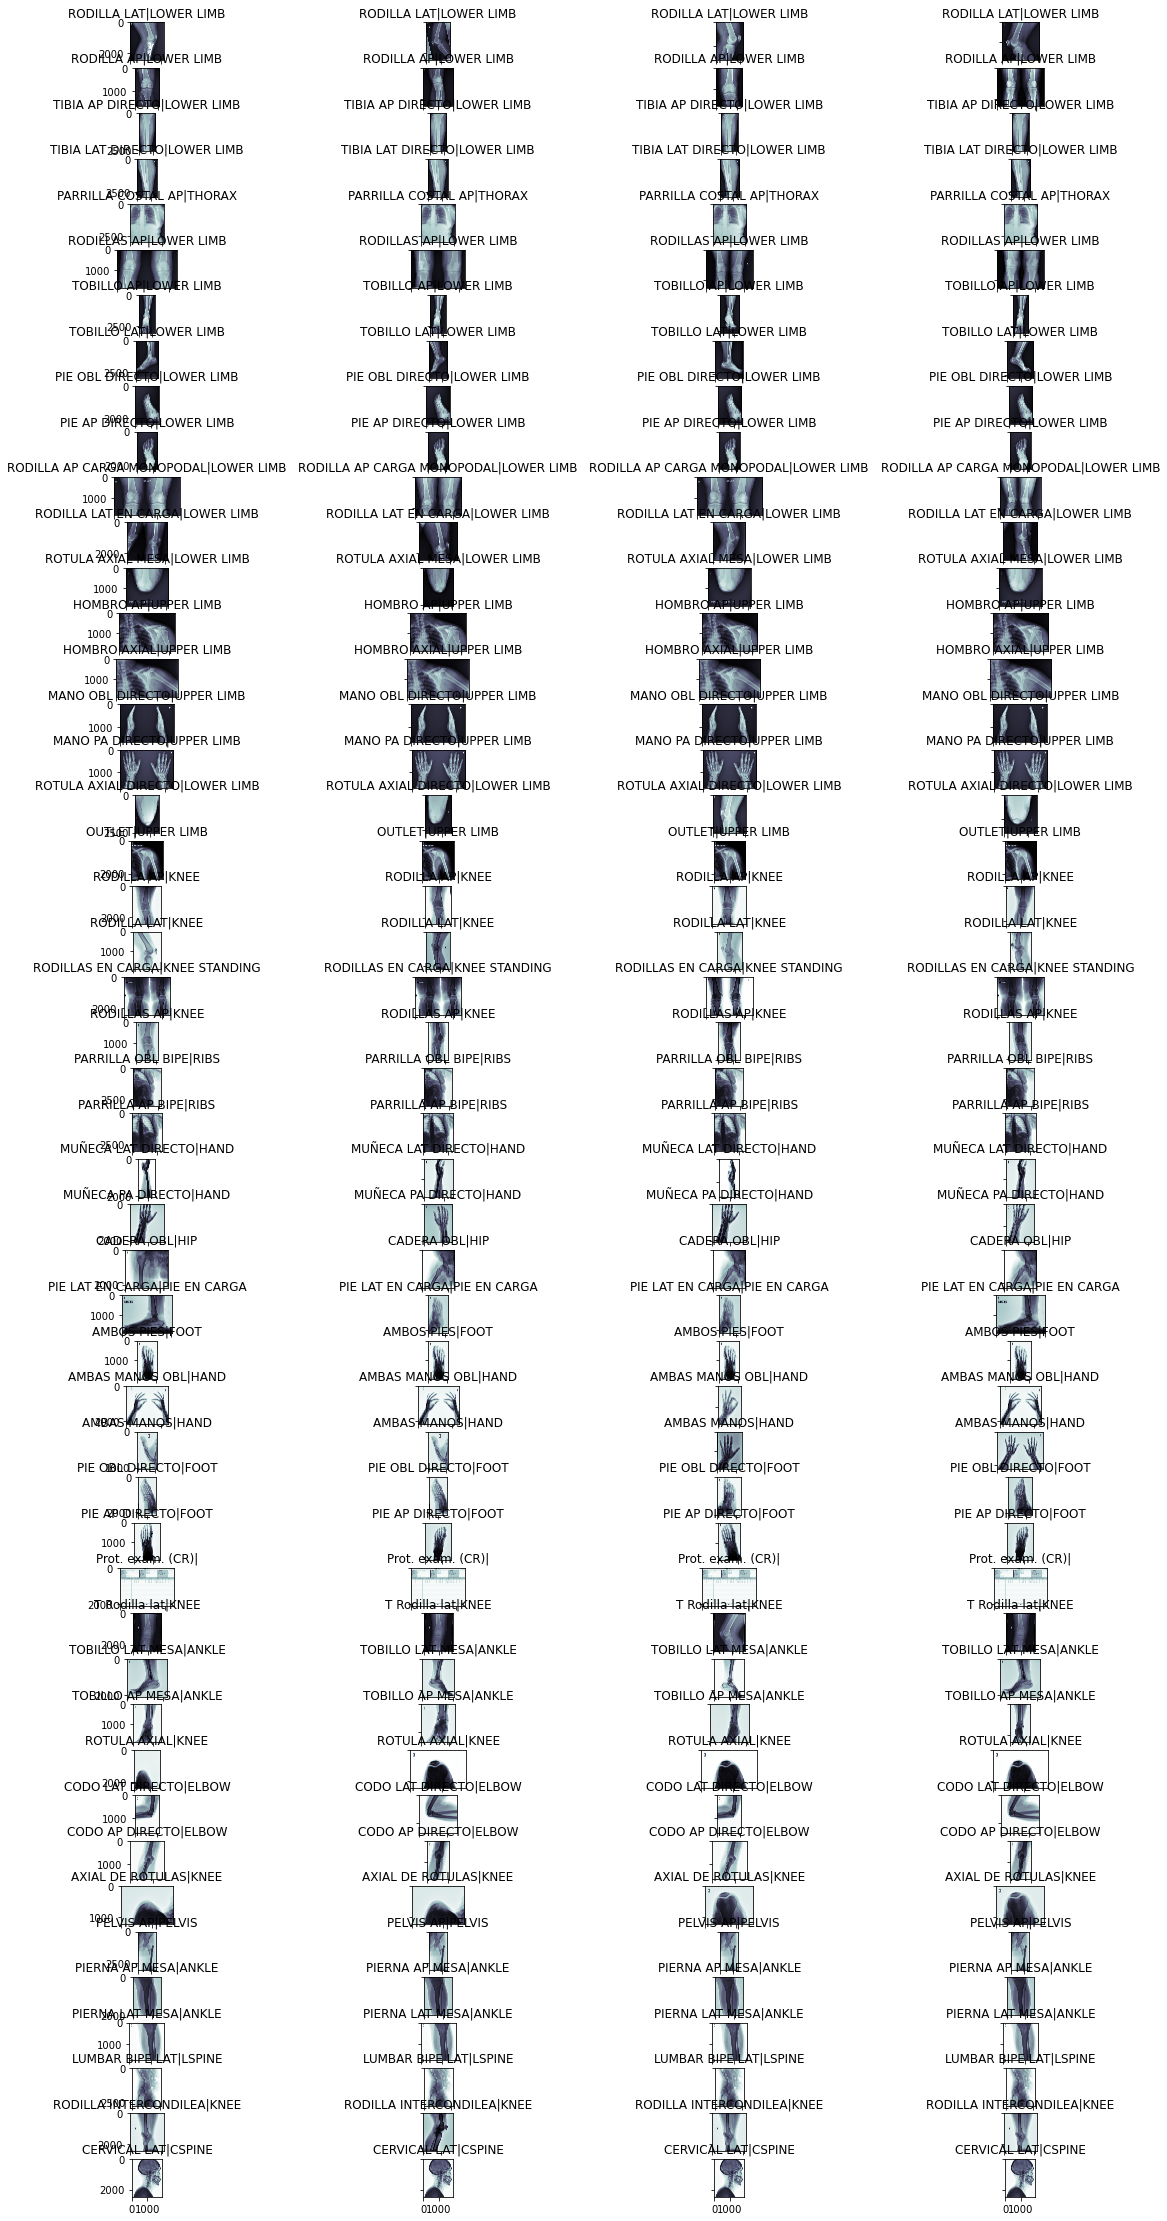

In [161]:
# df_match = pivot_df
df_match = get_each_case_samples(df, ['SeriesDescription', 'BodyPartExamined'], max_samples_per_case=4)
plot_DCMs(df_match['fname'], n_cols=[4], figsize=(20,40))

In [152]:
# Check starts with
correct_check_DICOM_dict = {
    'SeriesDescription': ['RODILLA AP', 'RODILLAS AP', 'PIERNA AP MESA'],
    'BodyPartExamined': ['LOWER LIMB', 'KNEE']
}

doubt_check_DICOM_dict = {
    'SeriesDescription': ['RODILLA INTERCONDILEA', 'RODILLA AP CARGA MONOPODAL', 'RODILLAS EN CARGA', 'T Rodilla lat', 'PIERNA AP MESA']
}

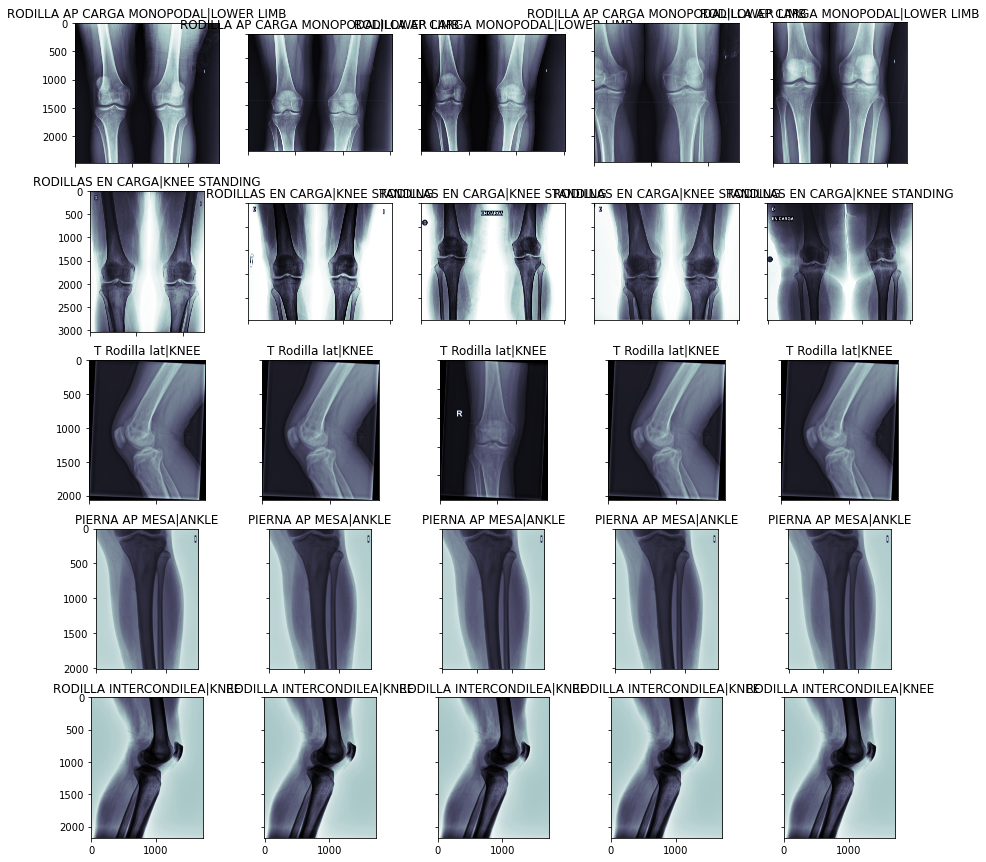

In [147]:
# df_match = df_check_DICOM(df, doubt_check_DICOM_dict)
df_match = sample_df_check_DICOM(df, doubt_check_DICOM_dict, max_samples_per_case=5)
plot_DCMs(df_match['fname'], n_cols=[5])

In [153]:
# df_match = df_check_DICOM(df, correct_check_DICOM_dict)
df_match = sample_df_check_DICOM(df, correct_check_DICOM_dict, max_samples_per_case=4)
plot_DCMs(df_match['fname'], n_cols=[4])

Error in callback <function flush_figures at 0x000001DF59D7F430> (for post_execute):


KeyboardInterrupt: 

## Filtered Data EDA

In [11]:
# Transform metadata to DataFrame
df = pd.DataFrame.from_dicoms(
    get_files(organize_folder, extensions='.dcm')
)

In [24]:
repr_flds = ['BitsStored','PixelRepresentation']
display(df.pivot_table(values=['img_mean','img_max','img_min','PatientID'], index=repr_flds,
                   aggfunc={'img_mean':'mean','img_max':'max','img_min':'min','PatientID':'count'}))
display(df.pivot_table(values=['WindowCenter','WindowWidth', 'RescaleIntercept', 'RescaleSlope'], index=repr_flds,
                   aggfunc={'mean','max','min','std','median'}))

PatientID  img_max      img_mean  img_min
BitsStored PixelRepresentation                                           
12         0                         1736     4095   2193.090445        0
16         0                            2    65280  14279.253605       16

RescaleIntercept                        \
                                            max mean median  min  std   
BitsStored PixelRepresentation                                          
12         0                                0.0  0.0    0.0  0.0  0.0   
16         0                                NaN  NaN    NaN  NaN  NaN   

                               RescaleSlope                        \
                                        max mean median  min  std   
BitsStored PixelRepresentation                                      
12         0                            1.0  1.0    1.0  1.0  0.0   
16         0                            NaN  NaN    NaN  NaN  NaN   

                               WindowCenter                             \
                                        max     mean   median      min   
BitsStored PixelRepresentation                                           
12         0                         2048.0   2048.0   2048.0   2048.0   
16         0                        25024.0  24824.0  24824.0  24624.0   

                                           WindowWidth                         \
                                       std         max          mean   median   
BitsStored PixelRepresentation                                                  
12         0                      0.000000      4096.0   4095.999424   4096.0   
16         0                    282.842712     47584.0  46152.000000  46152.0   

                                                      
                                    min          std  
BitsStored PixelRepresentation                        
12         0                     4095.0     0.024001  
16         0                    44720.0  2025.153821

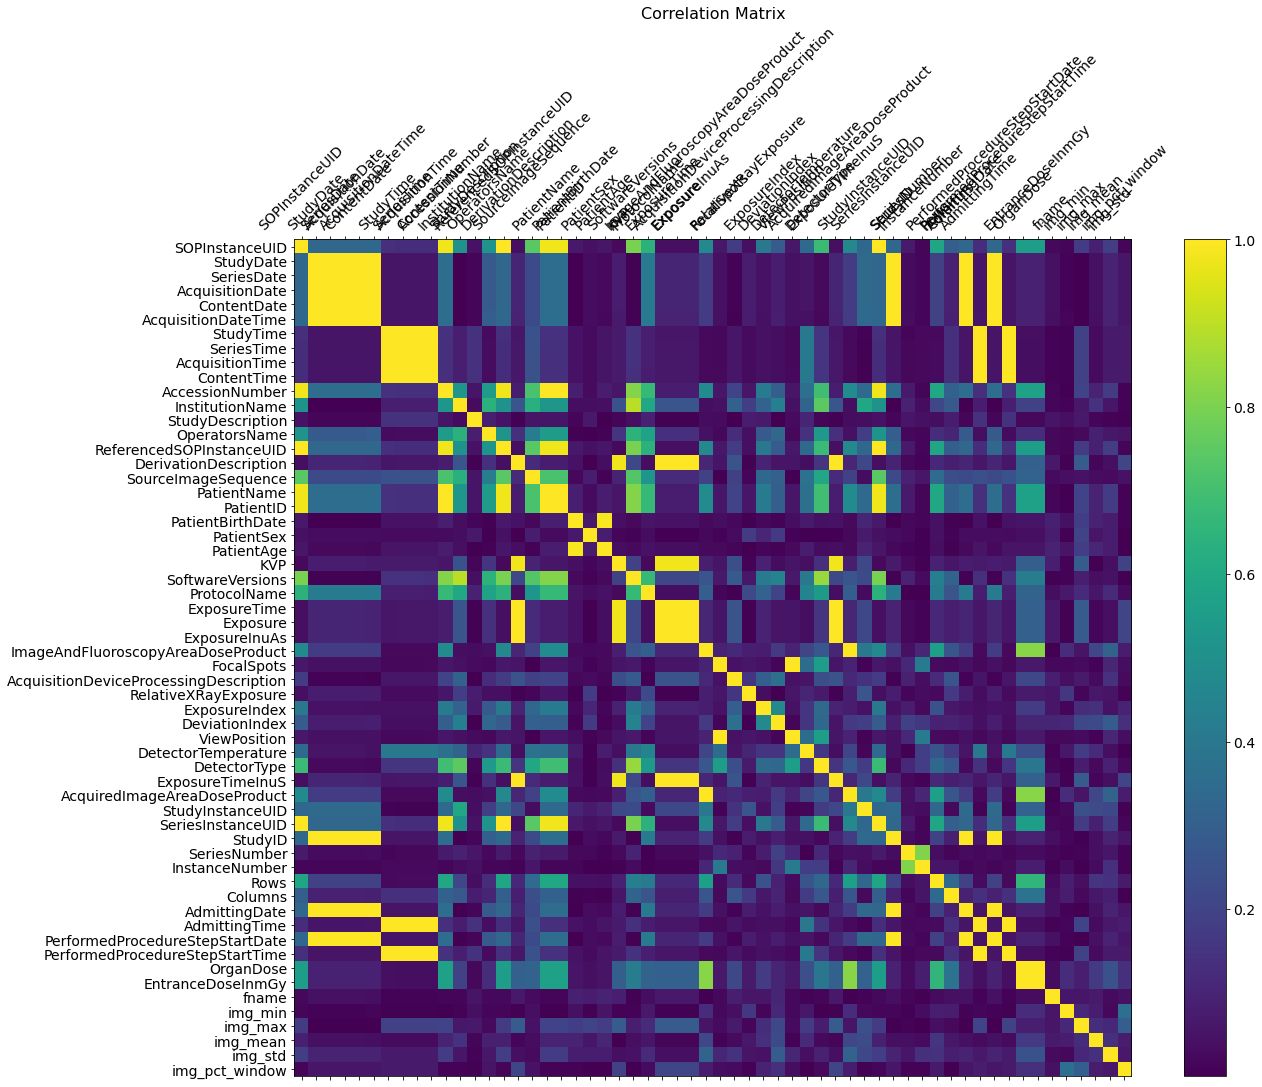

In [13]:
corr = df.astype('string').astype('category').apply(lambda x: x.cat.codes, axis=0).corr()

corr = corr.loc[corr.notnull().any(axis=0),corr.notnull().any(axis=1)].abs()

f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(corr.shape[1]), corr.columns, fontsize=14, rotation=45)
plt.yticks(range(corr.shape[1]), corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

The DeviationIndex seems to be a potential features related to the `img_mean` and `img_std`